## Locate which region the driver is in using latitude-longitude

In [1]:
import csv
import pandas as pd
# GO transit stops in regions of interest as sample input (representing lat-long collected from drivers' GPS data)
with open('sample_GOtransit_locations.csv', newline='') as f1:
    reader1 = csv.reader(f1)
    samples = list(reader1)

driver_location = samples[56] # pick a driver
input = [float(driver_location[1]), float(driver_location[2])]
print(input)

[44.35112, -79.627441]


In [2]:
import csv
import math

with open('Lat_Long_Ontario_Cities.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

# columns: 'City', 'Latitude', 'Longitude', 'Area, greater metropolitan (km²)', 'Radius (km)'
# latitude and longitude of centers of regions

data = data[1:] # remove headings

In [3]:
# Use Haversine formula to compute the great-circle distance between 2 points
def distance_from_cycenter(citycenter, input):
  R = 6373.0 # radius of the Earth in km

  cy_lat = math.radians(citycenter[0])
  cy_long = math.radians(citycenter[1])
  in_lat = math.radians(input[0])
  in_long = math.radians(input[1])

  dlat = in_lat - cy_lat
  dlon = in_long - cy_long

  a = math.sin(dlat / 2)**2 + math.cos(cy_lat) * math.cos(in_lat) * math.sin(dlon / 2)**2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
  distance = R * c
  return distance

In [4]:
# Check of driver's location is within the area of the regions
regions = []
for region in data:
  city = region[0]
  latlong = [float(region[1]), float(region[2])]
  radius = float(region[4])
  dist = distance_from_cycenter(latlong, input)
  if dist <= radius:
    regions.append([city])

print("Driver is in region: ", regions)

Driver is in region:  [['Barrie']]


## Import data and explore data

In [5]:
import pandas as pd

aboriginal = pd.read_csv("CLEANaboriginal.csv")

income = pd.read_csv("CLEANincome.csv")

education = pd.read_csv("CLEANlabor_education.csv")

trafficking = pd.read_csv("CLEANhumantraffickingALL.csv")

sexploitation = pd.read_csv("CLEANsexploitation.csv")

In [6]:
aboriginal

,Region,Total - Individual low-income status [3],Low-income status - not applicable [4],Low-income status - applicable,In low income,Not in low income,Prevalence of low income (%) [5]
0,Kingston,5585,0,5585,1520,4060,27.2
1,Belleville,5245,0,5245,1255,3990,23.9
2,Peterborough,5445,995,4445,1465,2980,33.0
3,Toronto,46320,210,46110,10030,36080,21.8
4,Hamilton,14440,0,14445,3885,10555,26.9
5,St.Catharines,11645,0,11645,3045,8600,26.1
6,Niagara,11645,0,11645,3045,8600,26.1
7,Kitchener,8880,0,8885,1605,7280,18.1
8,Cambridge,8880,0,8885,1605,7280,18.1
9,Waterloo,8880,0,8885,1605,7280,18.1


In [7]:
aboriginal.dtypes

Region                                       object
Total - Individual low-income status [3]      int64
Low-income status - not applicable [4]        int64
Low-income status - applicable                int64
In low income                                 int64
Not in low income                             int64
Prevalence of low income (%) [5]            float64
dtype: object

In [8]:
income

,Region,Total - Household low-income status,Low-income status - not applicable,Low-income status - applicable,In low income,Not in low income,Prevalence of low income
0,Kingston,53520,0,53515,9870,43650,18.441704
1,Belleville,21730,0,21730,4550,17185,20.933977
2,Peterborough,57740,610,57135,10635,46495,22.873427
3,Toronto,1112930,0,1112925,259085,853845,23.279541
4,Hamilton,211600,0,211595,39370,172230,18.605860
5,Guelph,52090,0,52090,7490,44600,14.378959
6,Niagara,183830,0,183830,32860,150965,17.875697
7,St. Catharines,56875,0,56870,11860,45010,20.854581
8,Brantford,39215,0,39215,7580,31635,19.329338
9,Cambridge,48240,0,48240,6585,41655,13.650498


In [9]:
income.dtypes

Region                                   object
Total - Household low-income status       int64
 Low-income status - not applicable       int64
Low-income status - applicable            int64
In low income                             int64
Not in low income                         int64
Prevalence of low income                float64
dtype: object

In [10]:
education

,Region,Total - Labour force status [2],In the labour force,Employed,Unemployed,Not in the labour force,Participation rate,Employment rate,Unemployment rate,% no postsecondary study
0,Kingston,102120,63770,58710,5060,38355,62.4,57.5,7.9,41.676459
1,Belleville,41475,24380,22640,1735,17100,58.8,54.6,7.1,51.127185
2,Peterborough,115245,68180,62740,5440,47065,59.2,54.4,8.0,45.928240
3,Toronto,2294790,1483680,1361375,122305,811110,64.7,59.3,8.2,40.893938
4,Hamilton,441060,278640,259070,19575,162410,63.2,58.7,7.0,48.365302
5,St.Catharines,111055,67005,61575,5435,44050,60.3,55.4,8.1,49.164828
6,Niagara,371555,226595,209890,16705,144965,61.0,56.5,7.4,49.466432
7,Kitchener,189220,130080,121190,8890,59140,68.7,64.0,6.8,47.566325
8,Cambridge,104035,71880,67305,4575,32150,69.1,64.7,6.4,53.525256
9,Waterloo,86985,57270,53325,3950,29710,65.8,61.3,6.9,38.966488


In [11]:
education.dtypes

Region                              object
Total - Labour force status [2]      int64
In the labour force                  int64
Employed                             int64
Unemployed                           int64
Not in the labour force              int64
Participation rate                 float64
Employment rate                    float64
Unemployment rate                  float64
% no postsecondary study           float64
dtype: object

In [12]:
trafficking

,Region Identifier,Region,Actual incidents,"Rate per 100,000 population",Percentage change in rate,Total cleared,"Total, persons charged","Rate, total persons charged per 100,000 population aged 12 years and over","Total, adult charged","Rate, adult charged per 100,000 population aged 18 years and over","Total, youth charged","Rate, youth charged per 100,000 population aged 12 to 17 years"
0,35521.0,Kingston,0,0.00,0.00,0,0,0.00,0,0.00,0,0.00
1,35522.0,Belleville,1,0.99,6.01,1,1,1.14,1,1.23,0,0.00
2,35529.0,Peterborough,2,1.62,100.00,1,1,0.92,0,0.00,1,13.89
3,35535.0,Toronto,52,0.85,21.74,48,63,1.19,60,1.23,3,0.72
4,35537.0,Hamilton,14,1.87,97.83,12,10,1.54,9,1.51,1,1.88
5,35539.0,St.Catharines,1,0.22,-75.31,1,1,0.25,1,0.27,0,0.00
6,NaN,Niagara,1,0.22,-75.31,1,1,0.25,1,0.27,0,0.00
7,35541.0,Kitchener,5,0.90,22.44,2,5,1.05,5,1.14,0,0.00
8,NaN,Cambridge,5,0.90,22.44,2,5,1.05,5,1.14,0,0.00
9,NaN,Waterloo,5,0.90,22.44,2,5,1.05,5,1.14,0,0.00


In [13]:
trafficking.dtypes

Region Identifier                                                             float64
Region                                                                         object
Actual incidents                                                                int64
Rate per 100,000 population                                                   float64
Percentage change in rate                                                     float64
Total cleared                                                                   int64
Total, persons charged                                                          int64
Rate, total persons charged per 100,000 population aged 12 years and over     float64
Total, adult charged                                                            int64
Rate, adult charged per 100,000 population aged 18 years and over             float64
Total, youth charged                                                            int64
Rate, youth charged per 100,000 population aged 12 to 

In [14]:
trafficking_feature = trafficking[['Region','Actual incidents']]
trafficking_feature = trafficking_feature.rename(columns={'Actual incidents': 'Trafficking incidents'})

In [15]:
sexploitation

,Region Identifier,Region,Actual incidents,"Rate per 100,000 population 21",Percentage change in rate 22,Total cleared,"Total, persons charged 24","Rate, total persons charged per 100,000 population aged 12 years and over 21 25","Total, adult charged","Rate, adult charged per 100,000 population aged 18 years and over 21 25","Total, youth charged 26 27","Rate, youth charged per 100,000 population aged 12 to 17 years 21 25"
0,35521.0,Kingston,1,0.61,100.00,1,1,0.69,1,0.74,0,0.00
1,35522.0,Belleville,0,0.00,57.56,0,0,0.00,0,0.00,0,0.00
2,35529.0,Peterborough,4,3.23,100.00,4,3,2.75,3,2.94,0,0.00
3,35535.0,Toronto,23,0.38,61.54,20,18,0.34,17,0.35,1,0.24
4,35537.0,Hamilton,6,0.80,97.83,4,4,0.62,4,0.67,0,0.00
5,35539.0,St.Catharines,4,0.87,-43.56,4,3,0.74,3,0.80,0,0.00
6,NaN,Niagara,4,0.87,-43.56,4,3,0.74,3,0.80,0,0.00
7,35541.0,Kitchener,4,0.72,291.81,4,2,0.42,2,0.46,0,0.00
8,NaN,Cambridge,4,0.72,291.81,4,2,0.42,2,0.46,0,0.00
9,NaN,Waterloo,4,0.72,291.81,4,2,0.42,2,0.46,0,0.00


In [16]:
sexploitation.dtypes

Region Identifier                                                                  float64
Region                                                                              object
Actual incidents                                                                     int64
Rate per 100,000 population 21                                                     float64
Percentage change in rate 22                                                       float64
Total cleared                                                                        int64
Total, persons charged 24                                                            int64
Rate, total persons charged per 100,000 population aged 12 years and over 21 25    float64
Total, adult charged                                                                 int64
Rate, adult charged per 100,000 population aged 18 years and over 21 25            float64
Total, youth charged 26 27                                                           int64

In [17]:
sexploitation_feature = sexploitation[['Region','Actual incidents']]
sexploitation_feature = sexploitation_feature.rename(columns={'Actual incidents': 'Sexploitation incidents'})

## Analyze relationships between features of different dataset and the cases of human trafficking in each region

### Income

In [18]:
i = income

In [19]:
i = pd.merge(i, trafficking_feature, on=['Region'])
i = pd.merge(i, sexploitation_feature, on=['Region'])

In [20]:
i.corr()

,Total - Household low-income status,Low-income status - not applicable,Low-income status - applicable,In low income,Not in low income,Prevalence of low income,Trafficking incidents,Sexploitation incidents
Total - Household low-income status,1.000000,-0.120324,0.999999,0.998692,0.999875,0.389308,0.972974,0.947420
Low-income status - not applicable,-0.120324,1.000000,-0.121673,-0.119229,-0.122358,0.020836,-0.164118,-0.140388
Low-income status - applicable,0.999999,-0.121673,1.000000,0.998690,0.999876,0.389216,0.973037,0.947455
In low income,0.998692,-0.119229,0.998690,1.000000,0.997762,0.415500,0.971180,0.941647
Not in low income,0.999875,-0.122358,0.999876,0.997762,1.000000,0.380934,0.973096,0.948740
Prevalence of low income,0.389308,0.020836,0.389216,0.415500,0.380934,1.000000,0.330552,0.284015
Trafficking incidents,0.972974,-0.164118,0.973037,0.971180,0.973096,0.330552,1.000000,0.947444
Sexploitation incidents,0.947420,-0.140388,0.947455,0.941647,0.948740,0.284015,0.947444,1.000000


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 82.14862660497008)

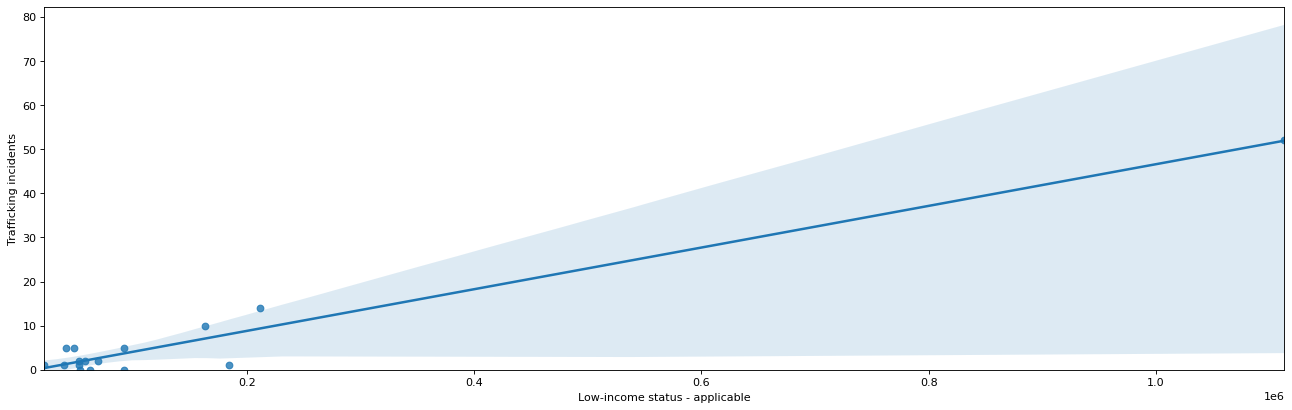

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
sns.regplot(x="Low-income status - applicable", y="Trafficking incidents", data=i)
plt.ylim(0,)

(0.0, 32.68839978452638)

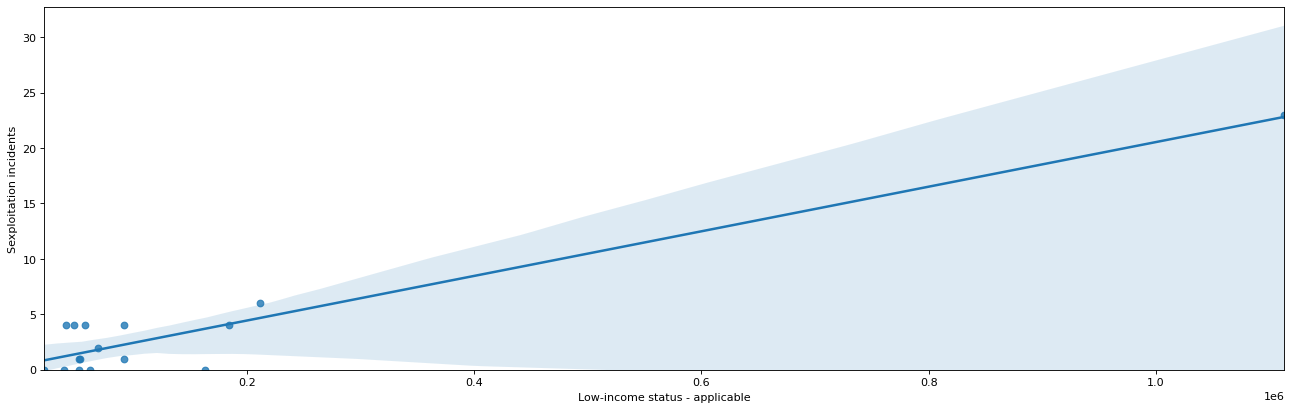

In [23]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
sns.regplot(x="Low-income status - applicable", y="Sexploitation incidents", data=i)
plt.ylim(0,)

In [24]:
i_feature = i[['Region','Low-income status - applicable','Sexploitation incidents','Trafficking incidents']]

### Education and employment

In [25]:
e = education
e = pd.merge(e, trafficking_feature, on=['Region'])
e = pd.merge(e, sexploitation_feature, on=['Region'])

In [26]:
e.corr()

,Total - Labour force status [2],In the labour force,Employed,Unemployed,Not in the labour force,Participation rate,Employment rate,Unemployment rate,% no postsecondary study,Trafficking incidents,Sexploitation incidents
Total - Labour force status [2],1.000000,0.999836,0.999819,0.999314,0.999453,0.054505,0.013801,0.225313,-0.368602,0.974172,0.943740
In the labour force,0.999836,1.000000,0.999995,0.999343,0.998691,0.070215,0.029478,0.213547,-0.371487,0.976056,0.944637
Employed,0.999819,0.999995,1.000000,0.999219,0.998651,0.071772,0.031164,0.211238,-0.371238,0.976280,0.944855
Unemployed,0.999314,0.999343,0.999219,1.000000,0.998417,0.052887,0.010745,0.239029,-0.374005,0.972879,0.941567
Not in the labour force,0.999453,0.998691,0.998651,0.998417,1.000000,0.025733,-0.014876,0.246641,-0.363012,0.969898,0.941298
Participation rate,0.054505,0.070215,0.071772,0.052887,0.025733,1.000000,0.996061,-0.717866,-0.160632,0.145059,0.095537
Employment rate,0.013801,0.029478,0.031164,0.010745,-0.014876,0.996061,1.000000,-0.775461,-0.130862,0.107250,0.060573
Unemployment rate,0.225313,0.213547,0.211238,0.239029,0.246641,-0.717866,-0.775461,1.000000,-0.110174,0.126102,0.145196
% no postsecondary study,-0.368602,-0.371487,-0.371238,-0.374005,-0.363012,-0.160632,-0.130862,-0.110174,1.000000,-0.393025,-0.358683
Trafficking incidents,0.974172,0.976056,0.976280,0.972879,0.969898,0.145059,0.107250,0.126102,-0.393025,1.000000,0.939094


(0.0, 96.62256366290005)

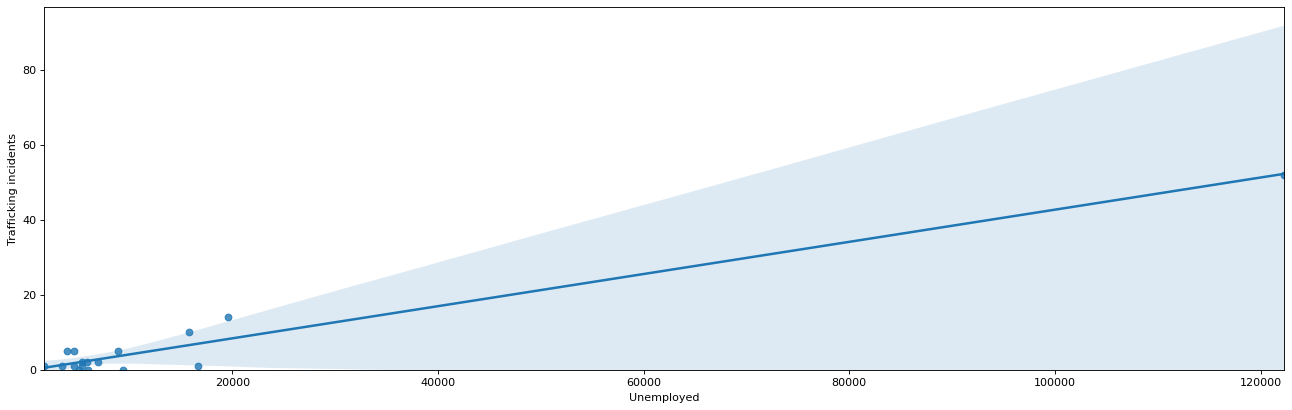

In [27]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
sns.regplot(x="Unemployed", y="Trafficking incidents", data=e)
plt.ylim(0,)

(0.0, 37.56131298943556)

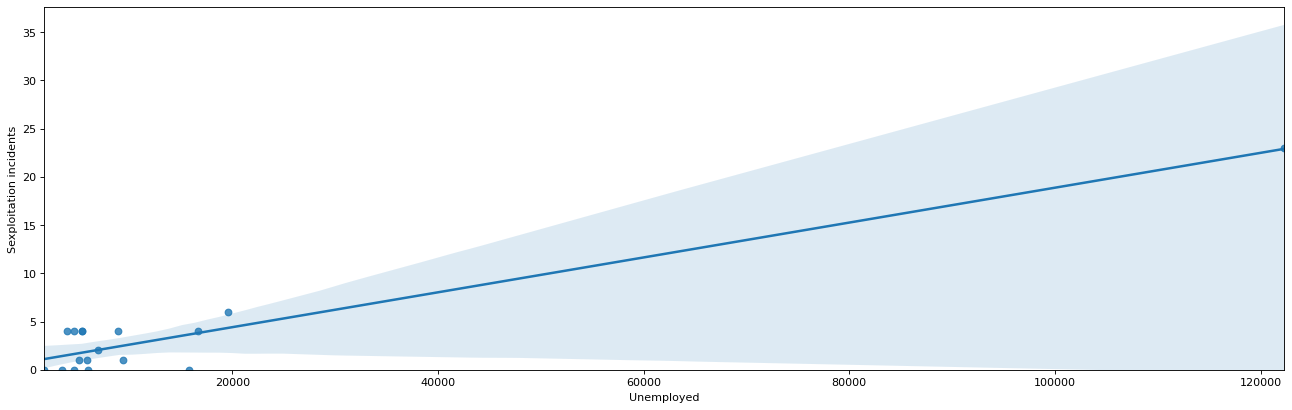

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
sns.regplot(x="Unemployed", y="Sexploitation incidents", data=e)
plt.ylim(0,)

In [29]:
e_feature = e[['Region','Unemployed']]

### Aboriginal

In [30]:
a = aboriginal
a = pd.merge(a, trafficking_feature, on=['Region'])
a = pd.merge(a, sexploitation_feature, on=['Region'])
a.corr()

,Total - Individual low-income status [3],Low-income status - not applicable [4],Low-income status - applicable,In low income,Not in low income,Prevalence of low income (%) [5],Trafficking incidents,Sexploitation incidents
Total - Individual low-income status [3],1.000000,0.130861,0.999498,0.959493,0.994470,0.005629,0.923072,0.903080
Low-income status - not applicable [4],0.130861,1.000000,0.099401,0.224197,0.060863,0.545806,-0.015138,0.049989
Low-income status - applicable,0.999498,0.099401,1.000000,0.955854,0.996187,-0.011820,0.926973,0.904816
In low income,0.959493,0.224197,0.955854,1.000000,0.926572,0.257382,0.842352,0.790242
Not in low income,0.994470,0.060863,0.996187,0.926572,1.000000,-0.091595,0.936326,0.923482
Prevalence of low income (%) [5],0.005629,0.545806,-0.011820,0.257382,-0.091595,1.000000,-0.118242,-0.182433
Trafficking incidents,0.923072,-0.015138,0.926973,0.842352,0.936326,-0.118242,1.000000,0.939094
Sexploitation incidents,0.903080,0.049989,0.904816,0.790242,0.923482,-0.182433,0.939094,1.000000


(0.0, 24.266241131866977)

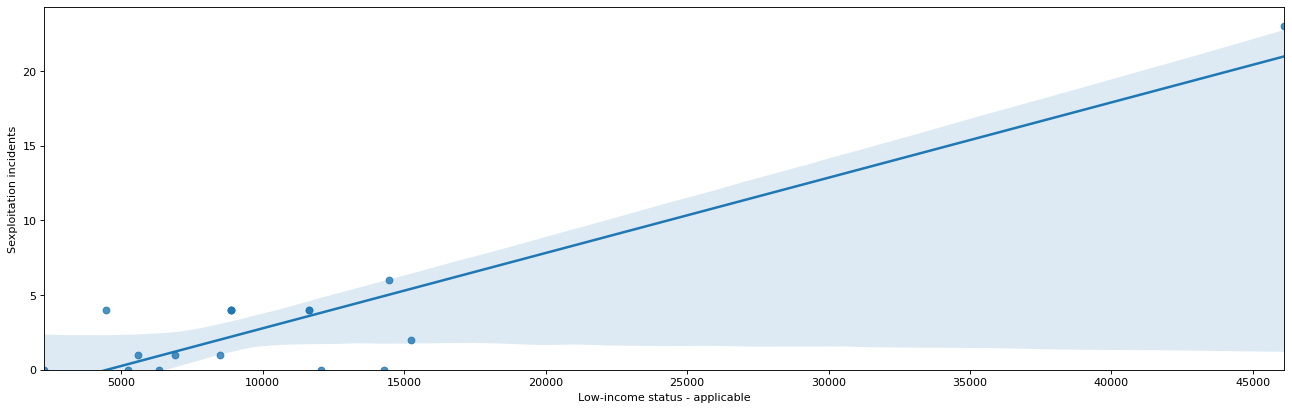

In [31]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
sns.regplot(x="Low-income status - applicable", y="Sexploitation incidents", data=a)
plt.ylim(0,)

(0.0, 54.95895131222503)

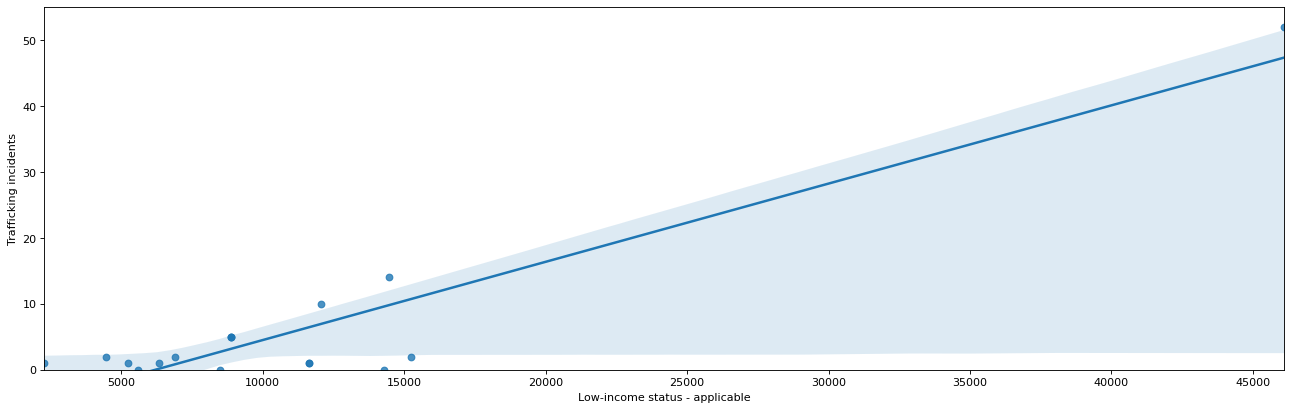

In [32]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
sns.regplot(x="Low-income status - applicable", y="Trafficking incidents", data=a)
plt.ylim(0,)

In [33]:
a_feature = a[['Region','Low-income status - applicable']]

In [34]:
a_feature = a_feature.rename(columns={'Low-income status - applicable': 'Aboriginal Low-income status - applicable'})

### Combing all features with the ground truth

In [35]:
df = pd.merge(i_feature, e_feature, on=['Region'])
df = pd.merge(df, a_feature, on=['Region'])
cols = df.columns.tolist()
df = df[cols[:2] + cols[-2:] + cols[2:-2]]
df

,Region,Low-income status - applicable,Unemployed,Aboriginal Low-income status - applicable,Sexploitation incidents,Trafficking incidents
0,Kingston,53515,5060,5585,1,0
1,Belleville,21730,1735,5245,0,1
2,Peterborough,57135,5440,4445,4,2
3,Toronto,1112925,122305,46110,23,52
4,Hamilton,211595,19575,14445,6,14
5,Guelph,52090,4610,2280,0,1
6,Niagara,183830,16705,11645,4,1
7,Brantford,39215,3430,6335,0,1
8,Cambridge,48240,4575,8885,4,5
9,Kitchener,92220,8890,8885,4,5


In [36]:
df.corr()

,Low-income status - applicable,Unemployed,Aboriginal Low-income status - applicable,Sexploitation incidents,Trafficking incidents
Low-income status - applicable,1.000000,0.999314,0.951851,0.947455,0.973037
Unemployed,0.999314,1.000000,0.951834,0.947454,0.972868
Aboriginal Low-income status - applicable,0.951851,0.951834,1.000000,0.904930,0.933097
Sexploitation incidents,0.947455,0.947454,0.904930,1.000000,0.947444
Trafficking incidents,0.973037,0.972868,0.933097,0.947444,1.000000


## Modelling

In [37]:
x = df[['Low-income status - applicable','Unemployed','Aboriginal Low-income status - applicable']]
y1 = df[['Trafficking incidents']]
y2 = df[['Sexploitation incidents']]

In [38]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y1_scaled = scaler.fit_transform(y1)
y2_scaled = scaler.fit_transform(y2)

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y1_scaled, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3
number of training samples: 13


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lre=LinearRegression()
lre.fit(x_train, y_train)
lre.score(x_test, y_test)

0.9579496818440252

In [42]:
y1_train_pred = lre.predict(x_train)
y1_test_pred = lre.predict(x_test)

In [43]:
y1_train_pred

array([[-0.36056392],
       [ 0.0964717 ],
       [-0.39044248],
       [ 0.22150195],
       [-0.4972419 ],
       [-0.23838007],
       [-0.36859139],
       [-0.2817817 ],
       [-0.20535548],
       [-0.36792386],
       [ 0.07339914],
       [-0.18687282],
       [-0.40646695]])

In [44]:
y_train

array([[-0.3482584 ],
       [-0.42901397],
       [-0.10599169],
       [ 0.62080845],
       [-0.42901397],
       [-0.3482584 ],
       [-0.50976954],
       [-0.50976954],
       [-0.10599169],
       [-0.10599169],
       [ 0.29778617],
       [-0.50976954],
       [-0.42901397]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


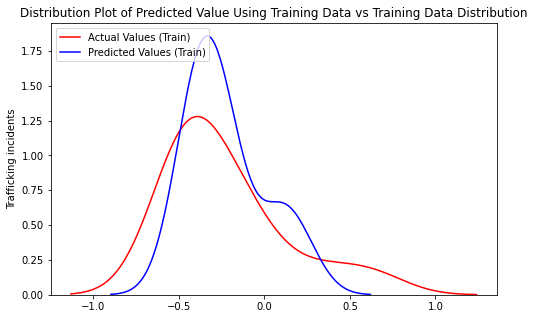

In [45]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.ylabel('Trafficking incidents')
    plt.legend(loc="upper left")

    plt.show()
    plt.close()

Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train,y1_train_pred , "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


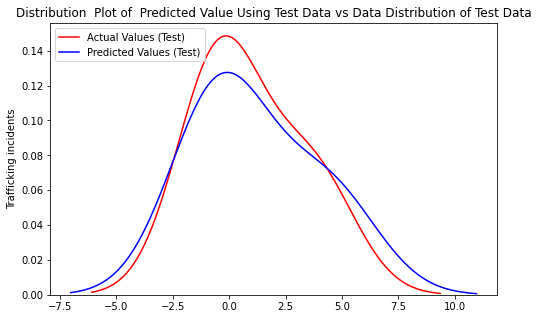

In [46]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y1_test_pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [47]:
import numpy as np
print("Model prediction error: " , np.sqrt(((y1_test_pred - y_test) ** 2).mean()))

Model prediction error:  0.3942812341231104


### Neural Nets

In [48]:
x_train.shape

(13, 3)

In [49]:
y_train.shape

(13, 1)

Epoch 1/110
1/1 [==============================] - 0s 366ms/step - loss: 0.1420
Epoch 2/110
1/1 [==============================] - 0s 4ms/step - loss: 0.1356
Epoch 3/110
1/1 [==============================] - 0s 6ms/step - loss: 0.1298
Epoch 4/110
1/1 [==============================] - 0s 10ms/step - loss: 0.1246
Epoch 5/110
1/1 [==============================] - 0s 12ms/step - loss: 0.1197
Epoch 6/110
1/1 [==============================] - 0s 7ms/step - loss: 0.1150
Epoch 7/110
1/1 [==============================] - 0s 8ms/step - loss: 0.1105
Epoch 8/110
1/1 [==============================] - 0s 8ms/step - loss: 0.1061
Epoch 9/110
1/1 [==============================] - 0s 7ms/step - loss: 0.1021
Epoch 10/110
1/1 [==============================] - 0s 7ms/step - loss: 0.0981
Epoch 11/110
1/1 [==============================] - 0s 6ms/step - loss: 0.0943
Epoch 12/110
1/1 [==============================] - 0s 6ms/step - loss: 0.0905
Epoch 13/110
1/1 [==============================] - 0s 6m

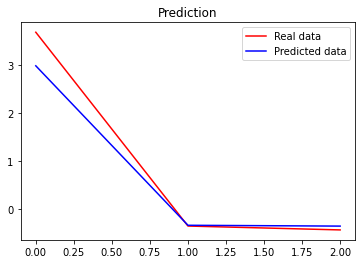

In [52]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim =3))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 110)
y_pred = model.predict(x_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [53]:
print("Model prediction error: " , np.sqrt(((y_pred - y_test) ** 2).mean()))

Model prediction error:  0.4064536228566045
